In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/myplot/plot_cm.py
/kaggle/input/income-classification/income_evaluation.csv


In [2]:
df = pd.read_csv('/kaggle/input/income-classification/income_evaluation.csv')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Опыт показал, что в названиях признаков иногда встерчаются лишние пробелы. Сразу уберем их для удобной работы

In [3]:
df = df.rename(columns = {col: col.strip() for col in df.columns})

Посмотрим на типов данных и на кол-во пропусков. Имеем 15 признаков, 9 из них имеют тип object, а 6 признаков, int. Типы object необходимо отдельно рассмотреть, т.к. pandas не смог определить.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Заметим, что в данных отсутсвуют пропуски, но возможно они просто заполнены каким-то значением

In [5]:
df.count()/len(df)

age               1.0
workclass         1.0
fnlwgt            1.0
education         1.0
education-num     1.0
marital-status    1.0
occupation        1.0
relationship      1.0
race              1.0
sex               1.0
capital-gain      1.0
capital-loss      1.0
hours-per-week    1.0
native-country    1.0
income            1.0
dtype: float64

Посмотрим на данных с типами object

In [6]:
df.select_dtypes(include=["object"]).head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Для всех признаков с типами object выведем их уникальные значения и частоты

In [7]:
obj_columns = df.select_dtypes(include=["object"]).columns
for col in obj_columns:
    
    print(' '*8, col,
          '\n\n',
          round(df[col].value_counts()/len(df),2),
          '\n')
    
    print('#'*50)

         workclass 

  Private             0.70
 Self-emp-not-inc    0.08
 Local-gov           0.06
 ?                   0.06
 State-gov           0.04
 Self-emp-inc        0.03
 Federal-gov         0.03
 Without-pay         0.00
 Never-worked        0.00
Name: workclass, dtype: float64 

##################################################
         education 

  HS-grad         0.32
 Some-college    0.22
 Bachelors       0.16
 Masters         0.05
 Assoc-voc       0.04
 11th            0.04
 Assoc-acdm      0.03
 10th            0.03
 7th-8th         0.02
 Prof-school     0.02
 9th             0.02
 12th            0.01
 Doctorate       0.01
 5th-6th         0.01
 1st-4th         0.01
 Preschool       0.00
Name: education, dtype: float64 

##################################################
         marital-status 

  Married-civ-spouse       0.46
 Never-married            0.33
 Divorced                 0.14
 Separated                0.03
 Widowed                  0.03
 Married-spouse-ab

В признаках 'workclass', 'occupation', 'native-country' встречается значение '?', которое состовляет 6%, 6% и 2% данных соответсвенно

In [8]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Значения включают в себя лишние пробелы, уберем их (это не критично, но удобно работать с чиситыми данными)

In [9]:
df[obj_columns] = df[obj_columns].applymap(lambda x: x.strip())
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Заменим все значения "?" на None

In [10]:
df[['workclass',
    'occupation',
    'native-country']] = df[['workclass',
                             'occupation',
                             'native-country']].applymap(
                                                         lambda x: None
                                                           if x=='?' 
                                                           else x
                                                          )

заполним все пропуски на часто встречающие значения

In [11]:
for col in ['workclass','occupation','native-country']:
    top_value = df[col].value_counts().idxmax()
    df[col].fillna(top_value,inplace=True)

Признаки 'education' и 'education-num' содержат одну и ту же информацию. Осавим только 'education-num'

In [12]:
df[['education','education-num']].drop_duplicates(subset=['education']).sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Целевая переменная 'income' и признак 'sex'  бинарные, заменим:<br><br>
'<=50K' на 0, а '>50K' на 1,<br>
'Female' на 0, а 'Male' на 1

In [13]:
df['income'] = df['income'].replace({'<=50K':0, '>50K':1})
df['sex'] = df['sex'].replace({'Female':0, 'Male':1})

Признак 'fnlwgt' показывает кол-во похожих объектов (описывает популяцию а не конкретый объект). Уберем этот признак

In [14]:
df.drop(['education', 'fnlwgt'],axis=1, inplace=True)
obj_columns = df.select_dtypes(include=['object']).columns.tolist()

In [15]:
df.head(3)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0


Посмотрим на кол-во дубликатов

In [16]:
df.duplicated().sum()

3591

In [17]:
df.loc[df.duplicated(), 'income'].value_counts()

0    2930
1     661
Name: income, dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

## Визуализация

Провизуализируем распределение целевой переменной

0    0.75
1    0.25
Name: income, dtype: float64


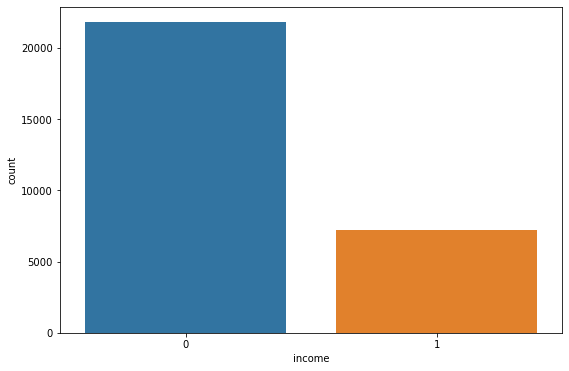

In [19]:
sns.countplot(df['income'])
print(round(df['income'].value_counts()/len(df),2))

Видим, что данные несбалансированы, у 75% людей доход меньше или равно 50к, а у 25% больше. В далнейшем попробуем бороться с несбалансированностью

Провизуализируем доходы мужщин и женщин. Видно, что у мужщин доход больше, чем у женщин. 

sex,0,1,All
income,,,
0,0.30,0.45,0.75
1,0.04,0.21,0.25
All,0.34,0.66,1.00


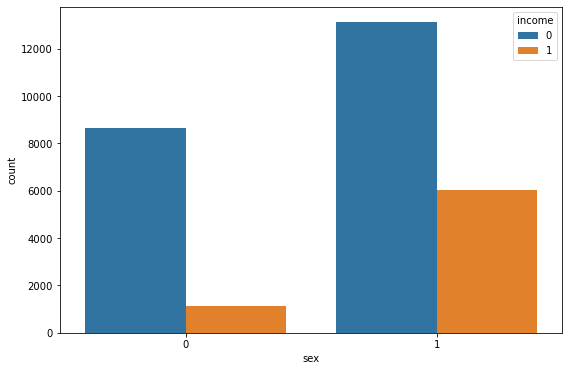

In [20]:
sns.countplot(x = 'sex',data=df,hue='income')
round(pd.crosstab(df['income'], df['sex'], normalize=True,margins=True),2)

больше 50к получают 31% мужщин и 12% женщин

In [21]:
print('Male\n',round(df.loc[df['sex']==1, 'income'].value_counts(normalize=True),2))
print('Female\n',round(df.loc[df['sex']==0, 'income'].value_counts(normalize=True),2))

Male
 0    0.69
1    0.31
Name: income, dtype: float64
Female
 0    0.88
1    0.12
Name: income, dtype: float64


Посмотрим на статистик числовых признаков

In [22]:
df.describe()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income
count,28970.000000,28970.000000,28970.000000,28970.00000,28970.000000,28970.000000,28970.000000
mean,39.280428,10.100759,0.661063,1203.01184,97.597825,40.652054,0.247843
std,13.682949,2.647603,0.473357,7794.72045,424.880797,12.748275,0.431767
min,17.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.00000,0.000000,40.000000,0.000000
50%,38.000000,10.000000,1.000000,0.00000,0.000000,40.000000,0.000000
75%,48.000000,13.000000,1.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,16.000000,1.000000,99999.00000,4356.000000,99.000000,1.000000


Построим кореллационную матрицу

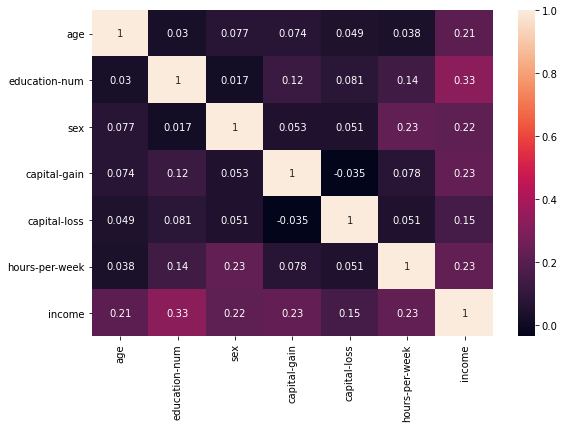

In [23]:
sns.heatmap(df.corr(),annot=True)
pass

В целом признаки между собой коррелирую слабо. Относительно сильно коррелируют признаки пол ('sex') и кол-во отработанных часов в неделью (house-per-week), Возможно это можно объяснить тем, что мужщины работают больше, чем женщины.

Смотря на боксплот можно сказать, что в большинстве случаев больше 50К получают более взрослые

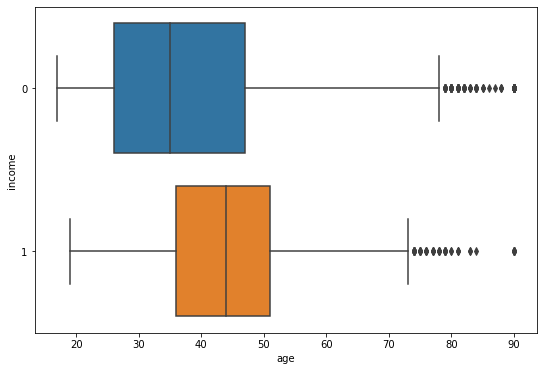

In [24]:
sns.boxplot(y="income", x="age", data=df, orient="h")

про 'hours-per-week' можно заметить, что среди тех, кто получает больше 50К, больше половина из них работают более 40 часов в неделю. А те, которые получают меньше 50К, больше половина из них работают меньше 40 часов 

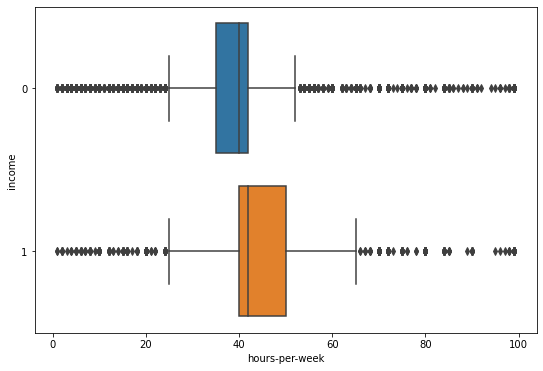

In [25]:
sns.boxplot(y="income", x="hours-per-week", data=df, orient="h")
pass

In [26]:
df['hours-per-week'].describe()

count    28970.000000
mean        40.652054
std         12.748275
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Конечно странно, что есть люди, которые работают 1 час или 99 часов в неделью. Возможно стоило бы убрать такие выбросы, но их оставим на потом

Посмотрим на статистку категориальных признаков

In [27]:
df.describe(include=['object'])

,workclass,marital-status,occupation,relationship,race,native-country
count,28970,28970,28970,28970,28970,28970
unique,8,7,14,6,5,41
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,United-States
freq,21130,13191,5451,11450,24318,26175


Для общего представления посмотрим на расспределений категориальных признаков, добавим также информацию о доходах

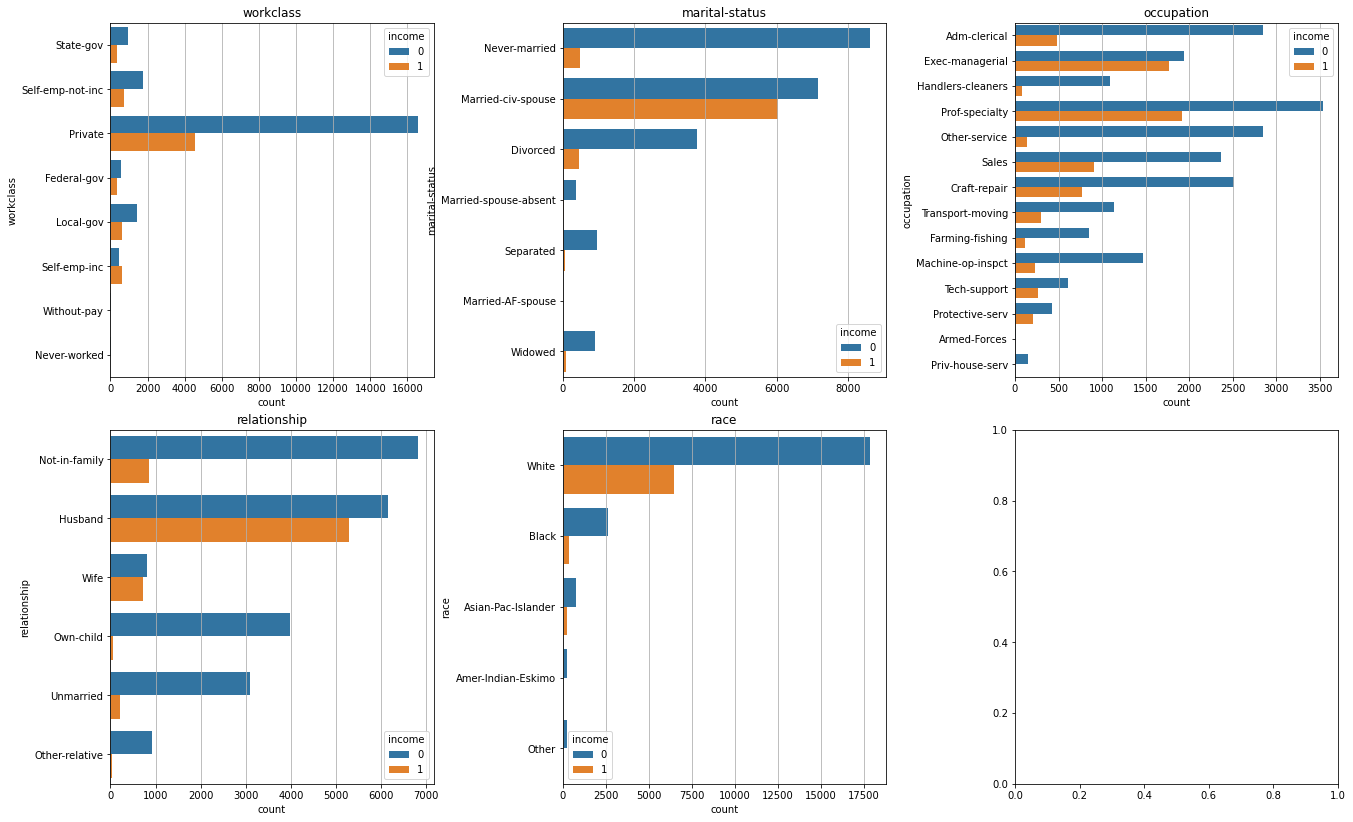

In [28]:
fig, ax = plt.subplots(2,3, figsize=(22, 14))
fig.subplots_adjust(hspace = .15, wspace=.4)

ax = ax.ravel()
for i in range(len(obj_columns[:-1])):
    col = obj_columns[i]
    ax[i].set_title(col)
    ax[i].grid()
    sns.countplot(y=col, hue='income', data=df,ax=ax[i])


## Векторизация номиниальных признаков 

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
enc = OneHotEncoder()
enc_data  = enc.fit_transform(df[obj_columns]).toarray()
enc_data = pd.DataFrame(enc_data, columns=enc.get_feature_names())

In [31]:
enc_data.index = df.index

In [32]:
enc = OneHotEncoder()
enc_data  = enc.fit_transform(df[obj_columns]).toarray()
enc_data = pd.DataFrame(enc_data, columns=enc.get_feature_names(),index=df.index)
df = pd.concat([df, enc_data],axis=1)
df.drop(obj_columns,axis=1,inplace=True)
df.head(3)

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,x0_Federal-gov,x0_Local-gov,x0_Never-worked,...,x5_Portugal,x5_Puerto-Rico,x5_Scotland,x5_South,x5_Taiwan,x5_Thailand,x5_Trinadad&Tobago,x5_United-States,x5_Vietnam,x5_Yugoslavia
0,39,13,1,2174,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,1,0,0,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,1,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Нормализация данных

In [33]:
from sklearn.preprocessing import MinMaxScaler

Нормализуем данные в диапазоне от 0 до 1. Это необходимо, т.к. будем использовать модели K-ближайщих соседей и Логистическую регрессию, а они чувсвительны к масштабу данных. (Knn-метрическая модель, вычисляет расстояние между объектами)

In [34]:
min_max = MinMaxScaler()
min_maxdf = df.copy()
min_maxdf = pd.DataFrame(min_max.fit_transform(min_maxdf), columns = min_maxdf.columns)
min_maxdf.head(3)

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,x0_Federal-gov,x0_Local-gov,x0_Never-worked,...,x5_Portugal,x5_Puerto-Rico,x5_Scotland,x5_South,x5_Taiwan,x5_Thailand,x5_Trinadad&Tobago,x5_United-States,x5_Vietnam,x5_Yugoslavia
0,0.301370,0.800000,1.0,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,1.0,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
corr_mat = min_maxdf.corr()
corr_mat.where(np.triu(corr_mat >.5, k=1)).stack().sort_values(ascending=False)


x1_Married-civ-spouse  x3_Husband    0.882896
sex                    x3_Husband    0.578711
dtype: float64

Разделим данные на обучающую и тестовую выборки (75% и 25% соответсвенно)

In [36]:
from sklearn.model_selection import train_test_split
(trainx,
 testx,
 trainy,
 testy) = train_test_split(min_maxdf.drop('income',axis=1),
                                  min_maxdf['income'],
                                  test_size = .25,
                                  random_state=18845
                          )
print(f'trainx: {trainx.shape}\ntestx: {testx.shape}')

trainx: (21727, 87)
testx: (7243, 87)


## Машинное обучение

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# from plot_cm import plot_confusion_matrix

Подбираем параметры для модели при 5 фолд кросс-валидации, в качаестве метрики качества будем использовать f1-score. Не используем accuracy, т.к. целевая переменная несблансированная. 

$$Precision = \frac{TP}{TP + FP}$$<br>
$$Recall = \frac{TP}{TP + FN}$$<br>
$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

In [38]:
#здесь будем запсиать результаты
result = {'model':[], 'f1-score':[], 'best_params':[],'n_components':[]}

In [39]:
# функция, которя запишет информацию о моделей в словарь
def save_model_info(model_name, score, best_parmas, n_components=87):
    result['model'].append(model_name)
    result['f1-score'].append(score)
    result['best_params'].append(best_parmas)
    result['n_components'].append(n_components)

### K-Neares Neighbors

In [49]:
%%time
model = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': np.arange(3,10,2),# 4
    'weights':['uniform', 'distance'],#2
   }

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx,trainy)

CPU times: user 29 s, sys: 809 ms, total: 29.8 s
Wall time: 7min 13s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': array([3, 5, 7, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [54]:
save_model_info('KNN', round(clf.best_score_,2), clf.best_params_)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87


In [55]:
import warnings 
warnings.filterwarnings('ignore')

In [56]:
%%time
model = LogisticRegression()
params = {
    "C":np.logspace(-3,3,7),#обратная сила регулиризации
    "penalty":["l1","l2"],# l1 lasso l2 ridge
    'n_jobs':[-1]
    }   

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx,trainy)

CPU times: user 2.34 s, sys: 396 ms, total: 2.73 s
Wall time: 1min 11s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'n_jobs': [-1], 'penalty': ['l1', 'l2']},
             scoring='f1')

In [57]:
save_model_info('LogReg', round(clf.best_score_,2), clf.best_params_)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87
1,LogReg,0.66,"{'C': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}",87


### RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
%%time
model = RandomForestClassifier(n_jobs=-1)
params = {
    'max_depth': np.arange(4,20,5),#4
    'max_features':['sqrt', 'log2', None]
    }   

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx,trainy)

CPU times: user 51.4 s, sys: 2.47 s, total: 53.9 s
Wall time: 5min 23s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': array([ 4,  9, 14, 19]),
                         'max_features': ['sqrt', 'log2', None]},
             scoring='f1')

In [60]:
save_model_info('RandomForest', round(clf.best_score_,2), clf.best_params_)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87
1,LogReg,0.66,"{'C': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}",87
2,RandomForest,0.68,"{'max_depth': 14, 'max_features': None}",87


### PCA

In [61]:
from sklearn.decomposition import PCA

Подберем количество компонентов локтевым методом

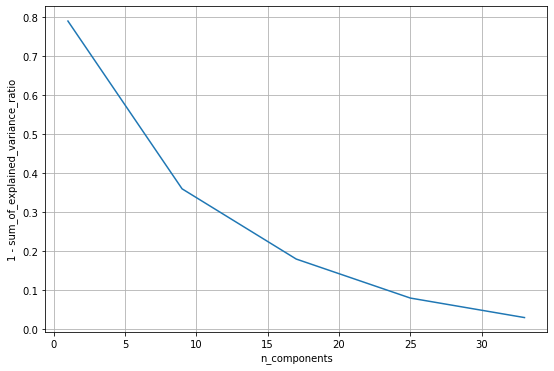

In [62]:
comp_res = {'n_components':[], 'sum_of_explained_variance_ratio':[]}
for n in range(1,40,8):
    pca = PCA(n_components = n)
    pca.fit(trainx)
    explained_variance_ratio = round(pca.explained_variance_ratio_.sum(),2)
    comp_res['n_components'].append(n)
    comp_res['sum_of_explained_variance_ratio'].append(explained_variance_ratio)
plt.plot(comp_res['n_components'], 1-np.array(comp_res['sum_of_explained_variance_ratio']))
plt.xlabel('n_components')
plt.ylabel('1 - sum_of_explained_variance_ratio')
plt.grid()
pass

33 компоненты носят 97% информации (всего признаков 87)

In [63]:
comp_res

{'n_components': [1, 9, 17, 25, 33],
 'sum_of_explained_variance_ratio': [0.21, 0.64, 0.82, 0.92, 0.97]}

Провизуализируем данные в двухмерном и в трехмерном пространстве

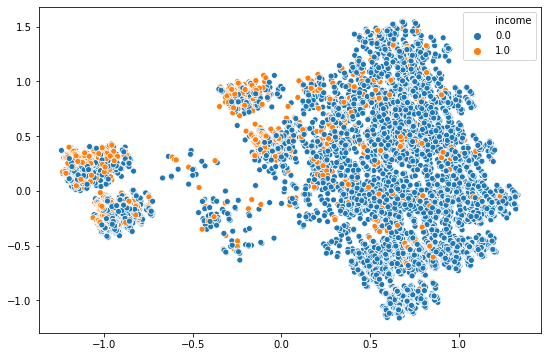

In [64]:
pca = PCA(n_components = 2)
trainx2 = pca.fit_transform(trainx)
sns.scatterplot(x = trainx2[:,0], y =trainx2[:,1],hue=trainy )
pass

In [65]:
import plotly.express as px
pca = PCA(n_components = 3)
trainx3 = pca.fit_transform(trainx)
fig = px.scatter_3d(x=trainx3[:,0], y=trainx3[:,1], z=trainx3[:,2],color=trainy.astype(int).astype('str'))
fig.show()
fig.write_html('3_components_visualization.html')

In [66]:
pca = PCA(n_components = 30)
trainx30 = pca.fit_transform(trainx)
round(pca.explained_variance_ratio_.sum(),2)

0.95

In [67]:
%%time
model = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': np.arange(3,10,2),# 4
    'weights':['uniform', 'distance'],#2
   }

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx30,trainy)

CPU times: user 13.9 s, sys: 292 ms, total: 14.2 s
Wall time: 44.9 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': array([3, 5, 7, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [68]:
save_model_info('KNN', round(clf.best_score_,2), clf.best_params_,30)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87
1,LogReg,0.66,"{'C': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}",87
2,RandomForest,0.68,"{'max_depth': 14, 'max_features': None}",87
3,KNN,0.60,"{'n_neighbors': 9, 'weights': 'uniform'}",30


In [69]:
%%time
model = LogisticRegression(n_jobs=-1)
params = {
    "C":np.logspace(-3,3,7),#обратная сила регулиризации
    "penalty":["l1","l2"]# l1 lasso l2 ridge
    }   

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx30,trainy)

CPU times: user 974 ms, sys: 145 ms, total: 1.12 s
Wall time: 12.8 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [70]:
save_model_info('LogReg', round(clf.best_score_,2), clf.best_params_,30)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87
1,LogReg,0.66,"{'C': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}",87
2,RandomForest,0.68,"{'max_depth': 14, 'max_features': None}",87
3,KNN,0.60,"{'n_neighbors': 9, 'weights': 'uniform'}",30
4,LogReg,0.61,"{'C': 1000.0, 'penalty': 'l2'}",30


In [71]:
%%time
model = RandomForestClassifier(n_jobs=-1)
params = {
    'max_depth': np.arange(4,20,5),#4
    'max_features':['sqrt', 'log2', None]
    }   

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2,random_state=8473)
clf = GridSearchCV(model, params, cv=rskf, scoring='f1')
clf.fit(trainx30,trainy)

CPU times: user 1min 43s, sys: 3.27 s, total: 1min 46s
Wall time: 26min 56s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=8473),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': array([ 4,  9, 14, 19]),
                         'max_features': ['sqrt', 'log2', None]},
             scoring='f1')

In [72]:
save_model_info('RandomForest', round(clf.best_score_,2), clf.best_params_,30)
pd.DataFrame(result)

,model,f1-score,best_params,n_components
0,KNN,0.61,"{'n_neighbors': 9, 'weights': 'uniform'}",87
1,LogReg,0.66,"{'C': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}",87
2,RandomForest,0.68,"{'max_depth': 14, 'max_features': None}",87
3,KNN,0.60,"{'n_neighbors': 9, 'weights': 'uniform'}",30
4,LogReg,0.61,"{'C': 1000.0, 'penalty': 'l2'}",30
5,RandomForest,0.61,"{'max_depth': 9, 'max_features': None}",30


Применение PCA отрицательно влияло на точности моделей

<Figure size 864x432 with 0 Axes>

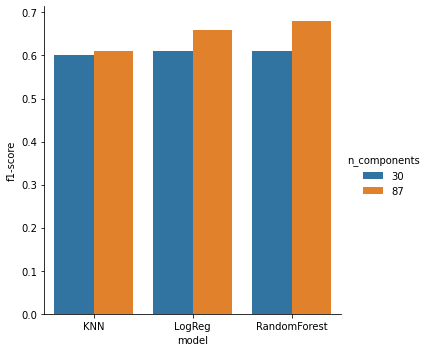

In [73]:
res = pd.DataFrame(result)
plt.figure(figsize=(12,6))

sns.factorplot(x = 'model',
               y= 'f1-score',
               kind='bar',hue='n_components',
               data=res)
pass

Хорошую точность показала модель RandomForest (без применения PCA)

In [74]:
rfr = RandomForestClassifier(n_jobs=-1,**{'max_depth': 14, 'max_features': None})
rfr.fit(trainx,trainy)
pred_train=rfr.predict(trainx)
pred_test = rfr.predict(testx)

In [57]:
from sklearn.metrics import f1_score

In [76]:
print(f'f1 on train: {round(f1_score(trainy, pred_train),2)}')
print(f'f1 on test: {round(f1_score(testy, pred_test),2)}')

f1 on train: 0.78
f1 on test: 0.68


Дальше попробуем бороться с несбалансированносью. 

## Борьба с несбаланстированностью

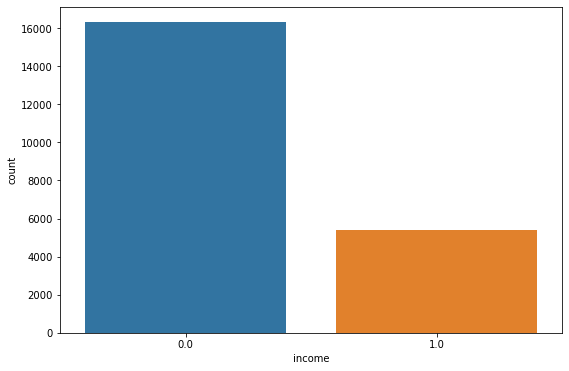

In [40]:
sns.countplot(trainy)

In [42]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [44]:
trainy.value_counts()

0.0    16306
1.0     5421
Name: income, dtype: int64

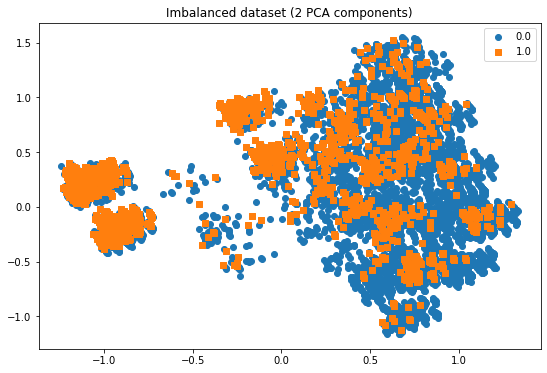

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(trainx)

plot_2d_space(X, trainy, 'Imbalanced dataset (2 PCA components)')

In [ ]:
SMOTE(r)

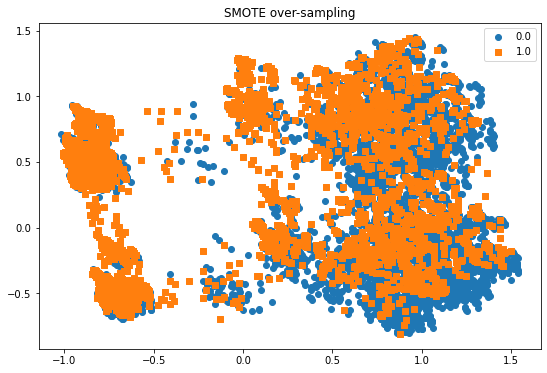

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X_sm, y_sm = smote.fit_sample(trainx, trainy)
pca = PCA(n_components=2)
X = pca.fit_transform(X_sm)
plot_2d_space(X, y_sm, 'SMOTE over-sampling')

In [49]:
y_sm.value_counts()

1.0    16306
0.0    16306
Name: income, dtype: int64

In [61]:
%%time
rfr = RandomForestClassifier(n_jobs=-1,**{'max_depth': 14, 'max_features': None})
rfr.fit(X_sm,y_sm)
pred_train=rfr.predict(X_sm)
pred_test = rfr.predict(testx)

CPU times: user 23.1 s, sys: 58.8 ms, total: 23.1 s
Wall time: 12.5 s


In [63]:
pred_train=rfr.predict(trainx)

In [64]:
print(f'f1 on train: {round(f1_score(trainy, pred_train),2)}')
print(f'f1 on test: {round(f1_score(testy, pred_test),2)}')

f1 on train: 0.79
f1 on test: 0.7


Удалось повысить точность на обуающей выборке на 1% и на тестовой выборке 2%

### CatBoostClassifier

In [67]:
from catboost import CatBoostClassifier

In [74]:
cbc = CatBoostClassifier()
cbc.fit(X_sm,y_sm, plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [75]:
pred_train=cbc.predict(trainx)
pred_test = cbc.predict(testx)
print(f'f1 on train: {round(f1_score(trainy, pred_train),2)}')
print(f'f1 on test: {round(f1_score(testy, pred_test),2)}')

f1 on train: 0.77
f1 on test: 0.72


In [82]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(testy, pred_test)

array([[5006,  478],
       [ 490, 1269]])

Построим матрицу сопряженности

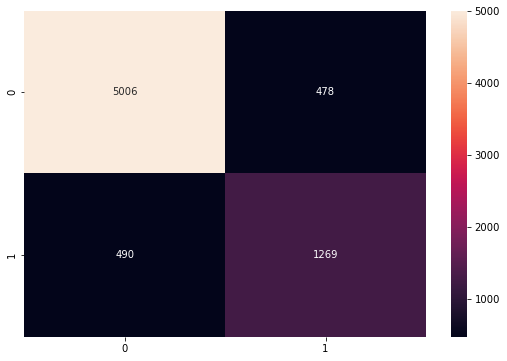

In [103]:
sns.heatmap(confusion_matrix(testy, pred_test),annot=True,fmt='d')

In [ ]:
cbc = CatBoostClassifier()
cbc.fit(X_sm,y_sm, plot=True,verbose=False)